# ４章　モデルの訓練

## 4.1 線形回帰

線形回帰モデルの予測
$$
\hat{y}=\theta _{0} + \theta _1x_1 + \theta _2 x_2 + \theta _n x_n \tag{4.1}
$$
ベクトルを用いて表したとき、
$$
\hat{y} = h_{\theta}(x) = \theta^{T}\cdot x \tag{4.2}
$$

MSE(mean squre error)が最小になるように訓練する。
$$
MSE(X,h_0) = \frac{1}{m} \sum_{i=1}^{m}(\theta^{T} \cdot x^{(i)} - y^{(i)}) ^2
$$

### 4.1.1 正規方程式

コスト関数を最小にする$\theta$の値を見つけるための閉形式解がある。これは直接的に解を与える数学的方程式である。
$$
\hat{\theta} = (X^{T} \cdot X)^{-1} \cdot X{T} \cdot y \tag{4.4}
$$
$\hat{\theta}$はコスト関数を最小にする$\theta$の解。

ダミーデータの作成

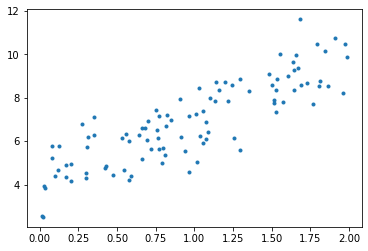

In [1]:
import numpy as np
from matplotlib import pyplot as plt

x = 2 * np.random.rand(100, 1)
y = 4 + 3*x + np.random.randn(100,1)
plt.scatter(x,y, marker='.')
plt.show()

In [2]:
X_b = np.c_[np.ones((100, 1)), x] # np.c_ 行列を横方向に結合
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 式4.4
print(theta_best)

[[4.10039406]
 [2.87866767]]


In [3]:
X_new = np.array([[0],
                  [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best) # 式4.2より計算
print(y_predict)

[[4.10039406]
 [9.8577294 ]]


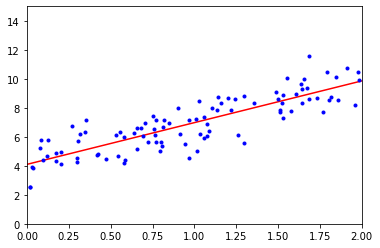

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0,2,0,15])
plt.show()

sklearn を利用した場合は以下のようになる

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.10039406] [[2.87866767]]


### 4.1.2 計算量
正規方程式は効率よく処理できるが、計算量が莫大になる。

## 4.2 勾配降下法
ランダムな初期位置から収束する場所を見つける。

### 4.2.1 バッチ勾配降下法
コスト関数の偏微分
$$
\frac{ \partial  }{ \partial \theta_{j} }MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m}(\theta^{T} \cdot x^{(i)} - y^{(i)})x^{(i)} \tag{4.5}
$$

これらの偏微分を個別に計算しなくても、式4.6を使えば、全部をまとめて計算できる。
$ \nabla_{\theta}MSE(\theta) $ と記述される勾配ベクトルにはコスト関数のあらゆる偏微分が含まれる。

$$
\nabla_{\theta} MSE(\theta) = 
\begin{pmatrix}
    \frac{\partial}{\partial \theta_{0}}MSE(\theta) \\
    \frac{\partial}{\partial \theta_{1}}MSE(\theta)\\
    \vdots \\
    \frac{\partial}{\partial \theta_{n}}MSE(\theta)
\end{pmatrix}
= \frac{2}{m}X^T \cdot (X \cdot \theta -y)
$$
このアルゴリズムがバッチ勾配降下法と呼ばれているのは、訓練セット全体の$X$に対する計算が含まれているからだ。

勾配降下法のステップ
$$
\theta^{\mathit{(next \ step)}} = \theta - \eta \nabla_{\theta}MSE(\theta) \tag{4.7}
$$

[[4.09962509]
 [2.87934324]]


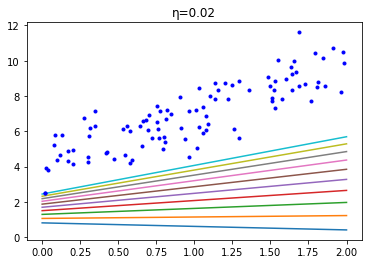

In [28]:
eta = 0.02
n_iterables = 1000
m = 100

X_new = np.array([[0],
                  [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
theta = np.random.randn(2, 1)
for iteration in range(n_iterables):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if iteration<10:
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict)
print(theta)
plt.plot(x, y, "b.")
plt.title("η=0.02")
plt.show()


[[4.10039406]
 [2.87866767]]


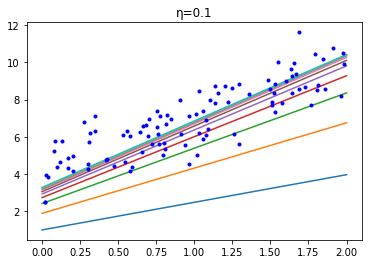

In [27]:
eta = 0.1
n_iterables = 1000
m = 100

X_new = np.array([[0],
                  [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
theta = np.random.randn(2, 1)
for iteration in range(n_iterables):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if iteration<10:
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict)
print(theta)
plt.plot(x, y, "b.")
plt.title("η=0.1")
plt.show()


[[-8.70804252e+41]
 [-9.91193369e+41]]


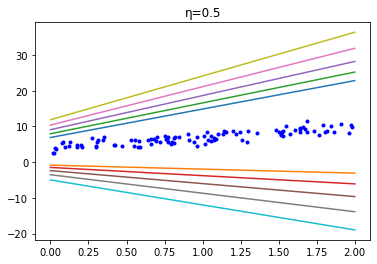

In [29]:
eta = 0.5
n_iterables = 1000
m = 100

X_new = np.array([[0],
                  [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
theta = np.random.randn(2, 1)
for iteration in range(n_iterables):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if iteration<10:
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict)
print(theta)
plt.plot(x, y, "b.")
plt.title("η=0.5")
plt.show()


### 4.2.2 確率的勾配降下法

バッチ勾配降下法の最大の問題は、勾配を計算するために各ステップで訓練セットを全部使うため、訓練セットが大きいときには計算速度が極端に遅くなることである。確率的勾配降下法(SGD)は、逆の極端に走り、各ステップで訓練セットから無作為にひとつのインスタンスを選び出し、そのインスタンスだけを使って勾配を計算する。イテレーションごとに操作するデータがごくわずかなのでバッチ勾配降下法と比べて非常に高速になる。